In [1]:
# Importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data

In [4]:
df=pd.read_csv("Unemployment in India.csv")
df

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
763                  NaN                                       NaN    NaN  
764                  NaN                                       NaN    NaN  
765                  NaN                                       NaN    NaN  
766                  NaN                                       NaN    NaN  
767                  NaN                                       NaN    NaN  

[768 rows x 7 columns]

In [5]:
# EDA( Exploratory Data Analysis)

In [6]:
df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural

In [7]:
df.tail()

Region  Date  Frequency   Estimated Unemployment Rate (%)  \
763    NaN   NaN        NaN                               NaN   
764    NaN   NaN        NaN                               NaN   
765    NaN   NaN        NaN                               NaN   
766    NaN   NaN        NaN                               NaN   
767    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
763                  NaN                                       NaN  NaN  
764                  NaN                                       NaN  NaN  
765                  NaN                                       NaN  NaN  
766                  NaN                                       NaN  NaN  
767                  NaN                                       NaN  NaN

In [8]:
df.shape

(768, 7)

In [9]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [10]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [11]:
df.describe()

Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000

In [12]:
# Data Cleaning

In [13]:
df[df.duplicated()]

Region  Date  Frequency   Estimated Unemployment Rate (%)  \
360    NaN   NaN        NaN                               NaN   
361    NaN   NaN        NaN                               NaN   
362    NaN   NaN        NaN                               NaN   
363    NaN   NaN        NaN                               NaN   
364    NaN   NaN        NaN                               NaN   
365    NaN   NaN        NaN                               NaN   
366    NaN   NaN        NaN                               NaN   
367    NaN   NaN        NaN                               NaN   
368    NaN   NaN        NaN                               NaN   
369    NaN   NaN        NaN                               NaN   
370    NaN   NaN        NaN                               NaN   
371    NaN   NaN        NaN                               NaN   
372    NaN   NaN        NaN                               NaN   
754    NaN   NaN        NaN                               NaN   
755    NaN   NaN        NaN                               NaN   
756    NaN   NaN        NaN                               NaN   
757    NaN   NaN        NaN                               NaN   
758    NaN   NaN        NaN                               NaN   
759    NaN   NaN        NaN                               NaN   
760    NaN   NaN        NaN                               NaN   
761    NaN   NaN        NaN                               NaN   
762    NaN   NaN        NaN                               NaN   
763    NaN   NaN        NaN                               NaN   
764    NaN   NaN        NaN                               NaN   
765    NaN   NaN        NaN                               NaN   
766    NaN   NaN        NaN                               NaN   
767    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
360                  NaN                                       NaN  NaN  
361                  NaN                                       NaN  NaN  
362                  NaN                                       NaN  NaN  
363                  NaN                                       NaN  NaN  
364                  NaN                                       NaN  NaN  
365                  NaN                                       NaN  NaN  
366                  NaN                                       NaN  NaN  
367                  NaN                                       NaN  NaN  
368                  NaN                                       NaN  NaN  
369                  NaN                                       NaN  NaN  
370                  NaN                                       NaN  NaN  
371                  NaN                                       NaN  NaN  
372                  NaN                                       NaN  NaN  
754                  NaN                                       NaN  NaN  
755                  NaN                                       NaN  NaN  
756                  NaN                                       NaN  NaN  
757                  NaN                                       NaN  NaN  
758                  NaN                                       NaN  NaN  
759                  NaN                                       NaN  NaN  
760                  NaN                                       NaN  NaN  
761                  NaN                                       NaN  NaN  
762                  NaN                                       NaN  NaN  
763                  NaN                                       NaN  NaN  
764                  NaN                                       NaN  NaN  
765                  NaN                                       NaN  NaN  
766                  NaN                                       NaN  NaN  
767                  NaN                                       NaN  NaN

In [14]:
df.isnull().sum()


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [15]:
# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# List of columns to fill missing values
columns_to_fill = [
    'Region', 'Date', 'Frequency', 
    'Estimated Unemployment Rate (%)', 
    'Estimated Employed', 
    'Estimated Labour Participation Rate (%)', 
    'Area'
]

# Fill missing values with the mode (most frequent value) of each column
for column in columns_to_fill:
    if column in df.columns:
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        print(f"Column '{column}' does not exist in the DataFrame.")


In [16]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [17]:
# Data Visualization

In [18]:
df.Area.value_counts()

Area
Urban    409
Rural    359
Name: count, dtype: int64

In [19]:
df.Region.value_counts()

Region
Andhra Pradesh      56
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

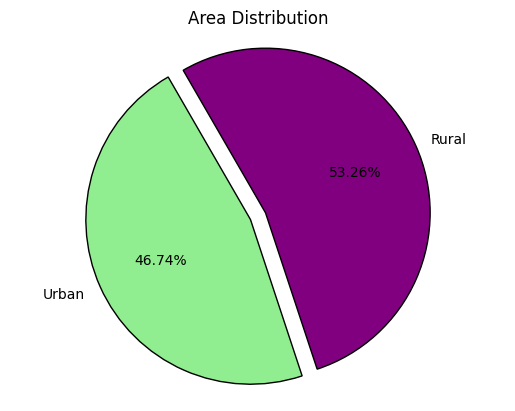

In [20]:
z = df.groupby('Area').size()

z.plot(kind='pie',
        colors=['lightgreen', 'purple'],
        explode=[0, 0.1],
        labels=['Urban', 'Rural'],
        autopct="%.2f%%",
        startangle=120,
        wedgeprops={'edgecolor': 'black'}
        )

plt.title("Area Distribution")
plt.ylabel("")
plt.axis('equal')
plt.show()

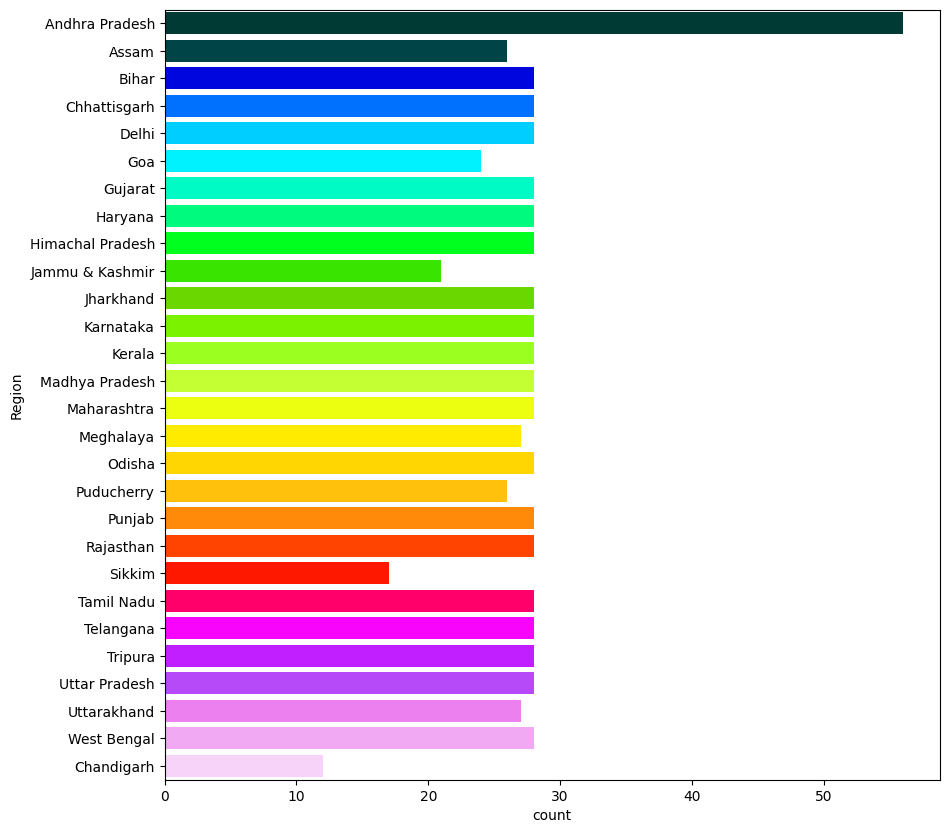

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(y='Region', data=df, palette="gist_ncar", saturation=1)
plt.show()

<Axes: ylabel='count'>

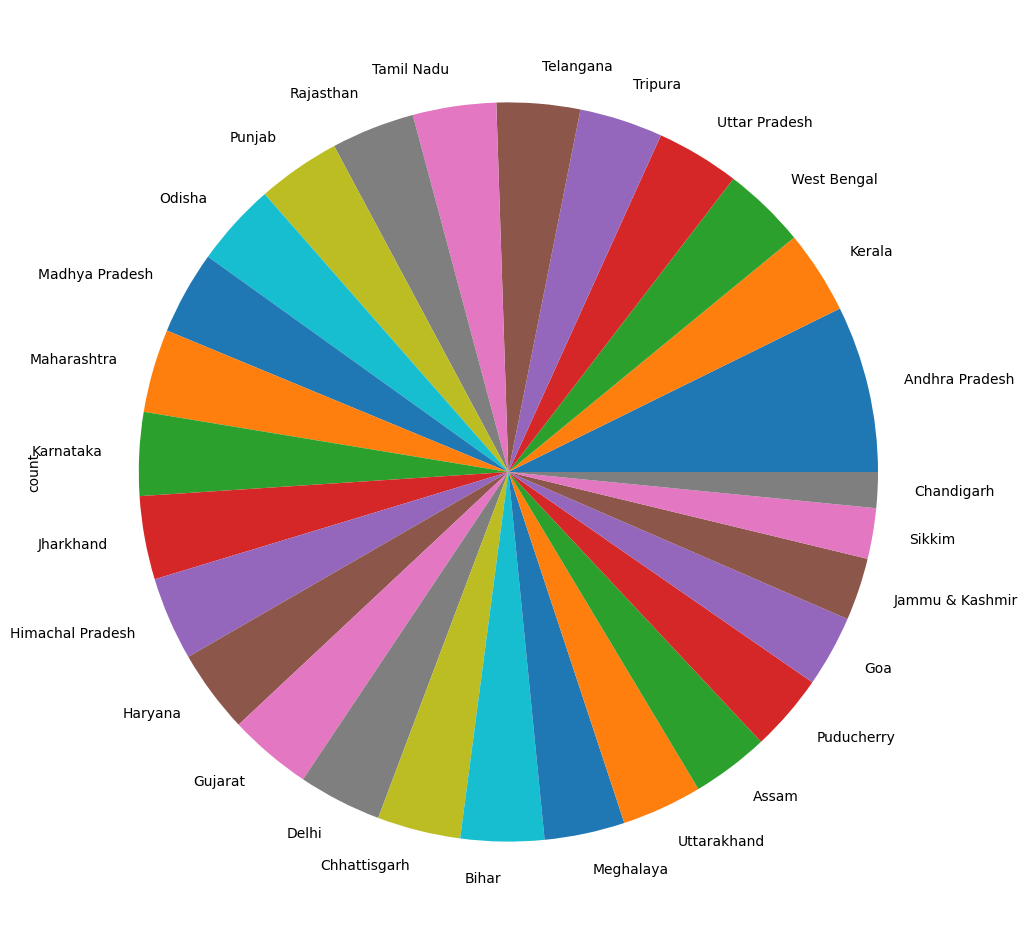

In [22]:
plt.figure(figsize=(12,12))
df['Region'].value_counts().plot.pie()

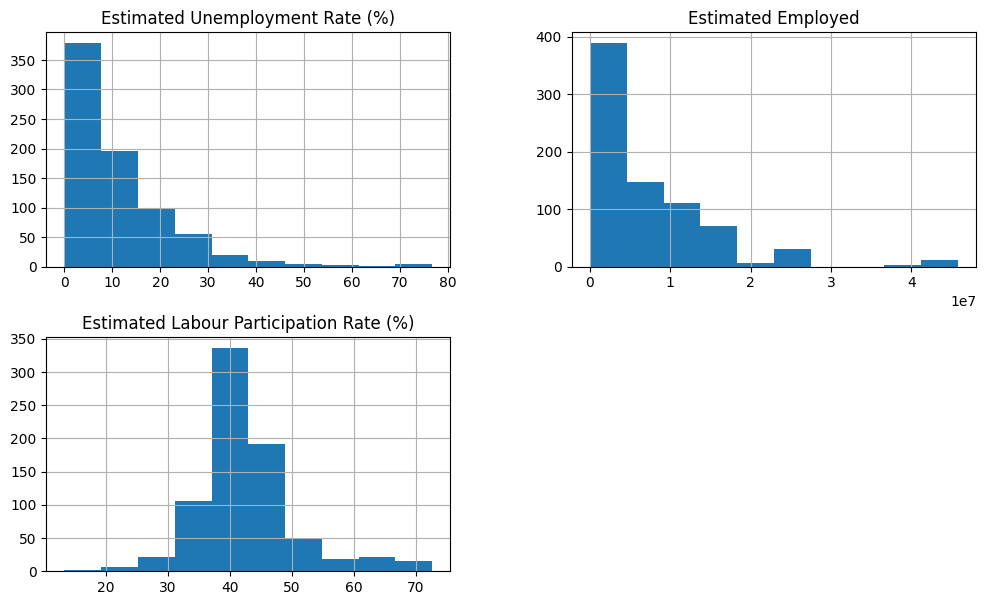

In [23]:
df.hist(figsize=(12,7))
plt.show()

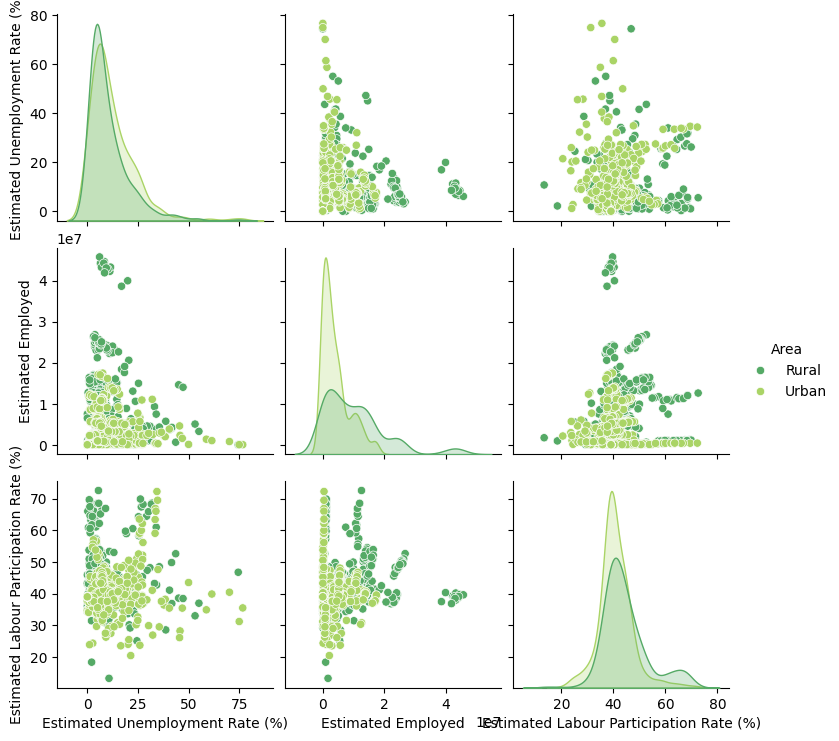

In [24]:
# Create a pair plot
sns.pairplot(df, vars=[
    "Estimated Unemployment Rate (%)", 
    "Estimated Employed", 
    "Estimated Labour Participation Rate (%)", 
], hue="Area",palette="summer")

# Display the plot
plt.show()

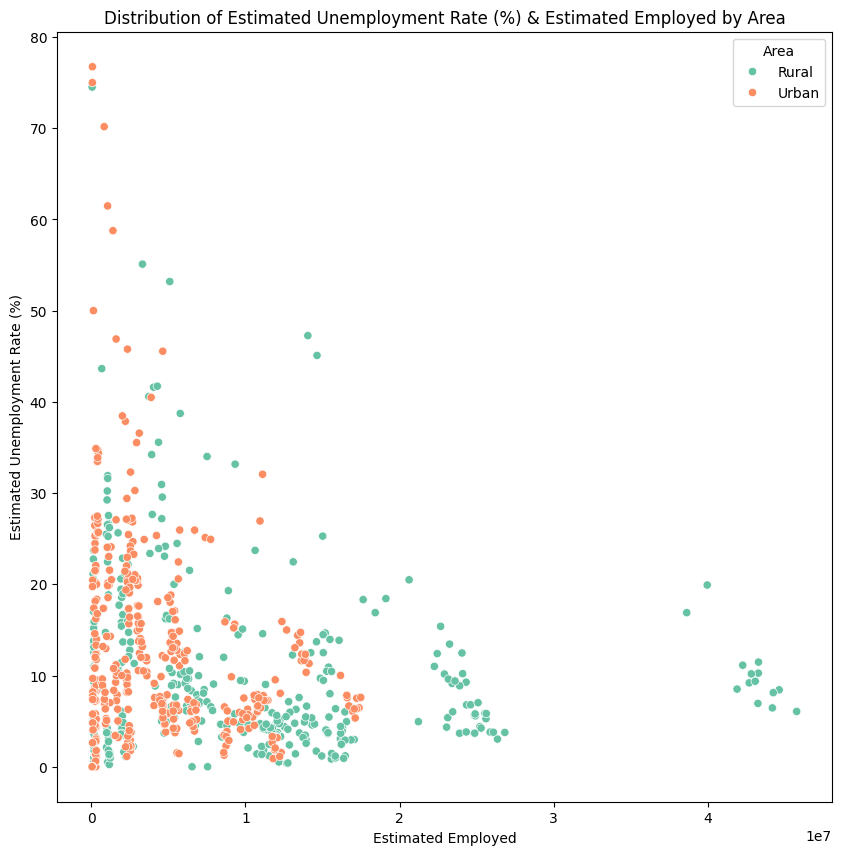

In [25]:
# Plot the horizontal countplot
plt.figure(figsize=(10, 10))  # Adjust height for better visibility
sns.scatterplot(x= "Estimated Employed", y='Estimated Unemployment Rate (%)', hue='Area', data=df, palette='Set2')  
plt.title("Distribution of Estimated Unemployment Rate (%) & Estimated Employed by Area")
plt.xlabel("Estimated Employed")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.legend(title='Area', loc='upper right')
plt.show()

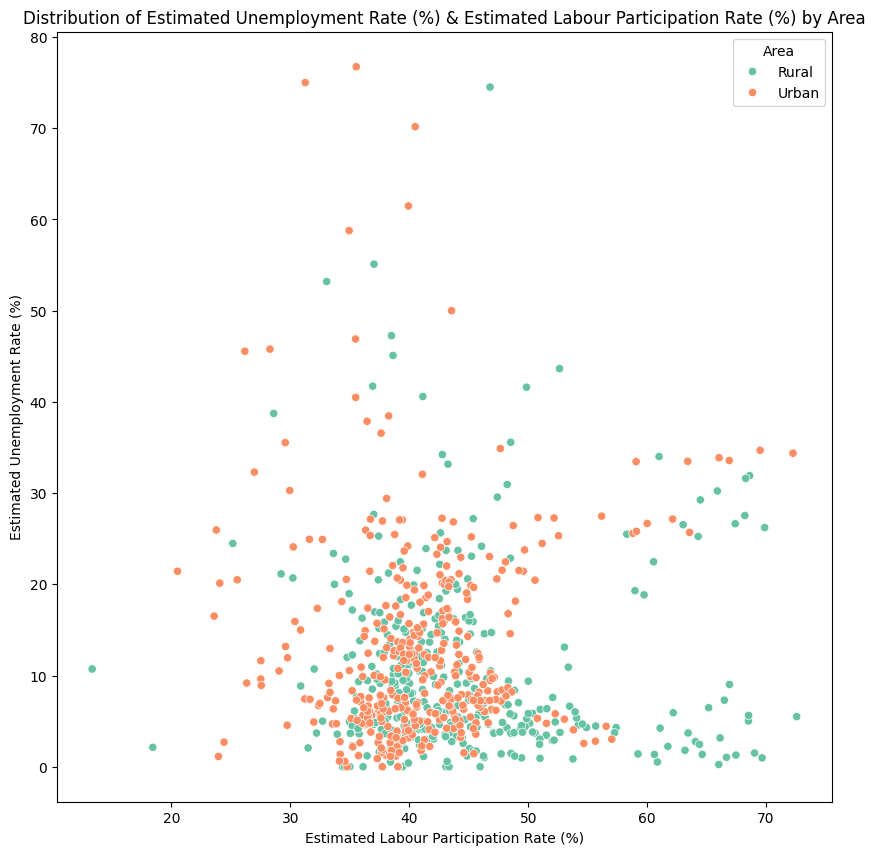

In [26]:
# Plot the horizontal countplot
plt.figure(figsize=(10, 10))  # Adjust height for better visibility
sns.scatterplot(x= "Estimated Labour Participation Rate (%)", y='Estimated Unemployment Rate (%)', hue='Area', data=df, palette='Set2')  
plt.title("Distribution of Estimated Unemployment Rate (%) & Estimated Labour Participation Rate (%) by Area")
plt.xlabel("Estimated Labour Participation Rate (%)")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.legend(title='Area', loc='upper right')
plt.show()

<Figure size 1000x1000 with 0 Axes>

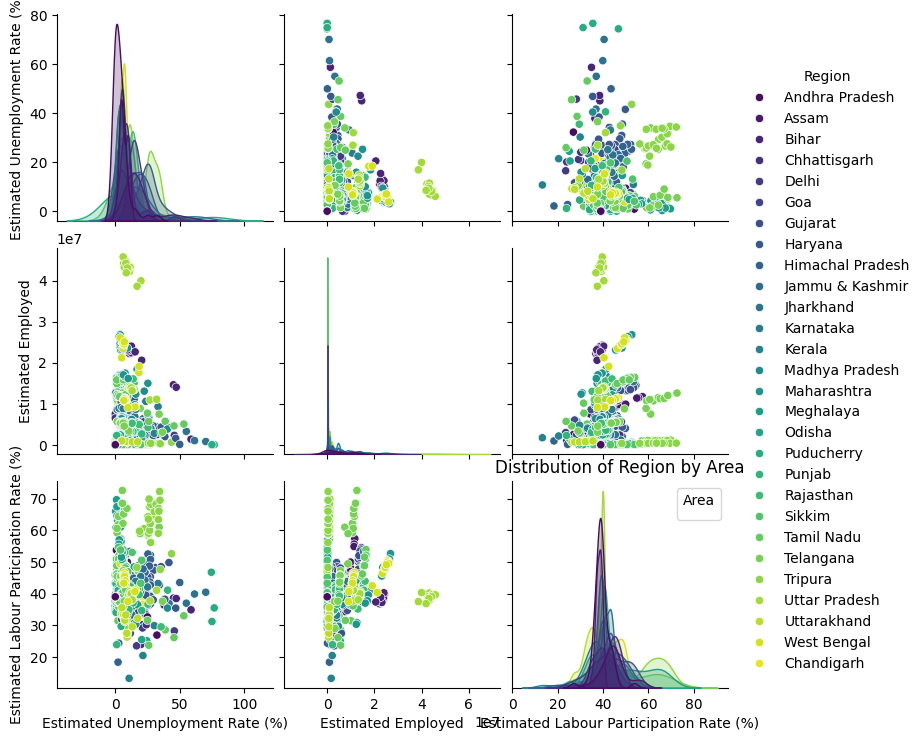

In [27]:
# Plot the horizontal countplot
#c= ['red', 'green']
plt.figure(figsize=(10, 10))  # Adjust height for better visibility
sns.pairplot(df, hue='Region', palette='viridis')
plt.title("Distribution of Region by Area")
plt.xlabel("Area")
plt.ylabel("Region")
plt.legend(title='Area', loc='upper right')
plt.show()

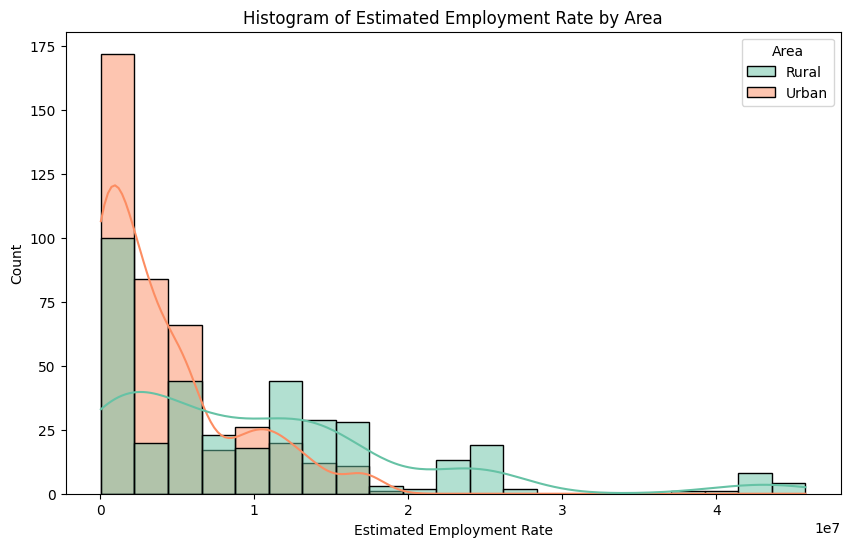

In [28]:
# Histogram of Estimated Employment Rate by Area
plt.style.use("default")

plt.figure(figsize=(10, 6))
sns.histplot(x="Estimated Employed", hue="Area", data=df, kde=True,
palette="Set2")
plt.title("Histogram of Estimated Employment Rate by Area")
plt.xlabel("Estimated Employment Rate")
plt.ylabel("Count")
plt.show()


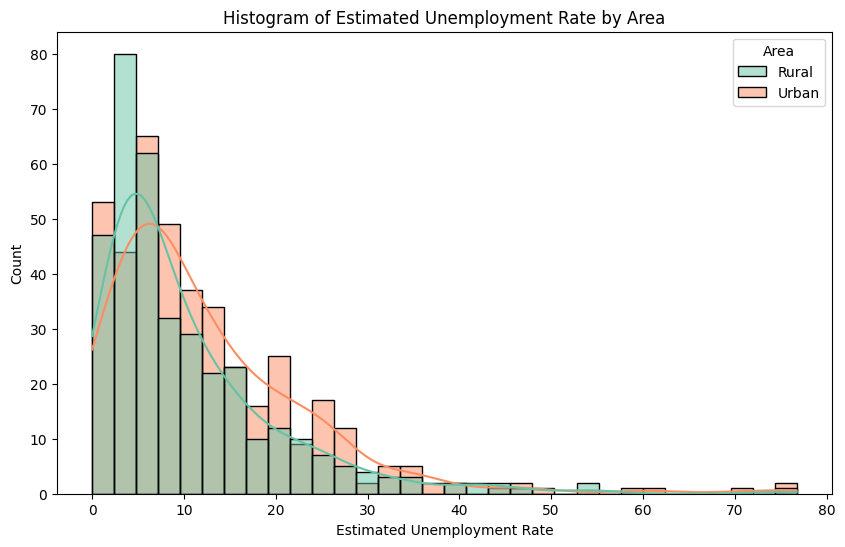

In [29]:
# Histogram of Estimated Unemployment Rate by Area
plt.style.use("default")
df.columns = ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
' Estimated Employed', ' Estimated Labour Participation Rate (%)',
'Area']
plt.figure(figsize=(10, 6))
sns.histplot(x=' Estimated Unemployment Rate (%)', hue="Area", data=df,kde=True, palette="Set2")
plt.title("Histogram of Estimated Unemployment Rate by Area")
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Count")
plt.show()


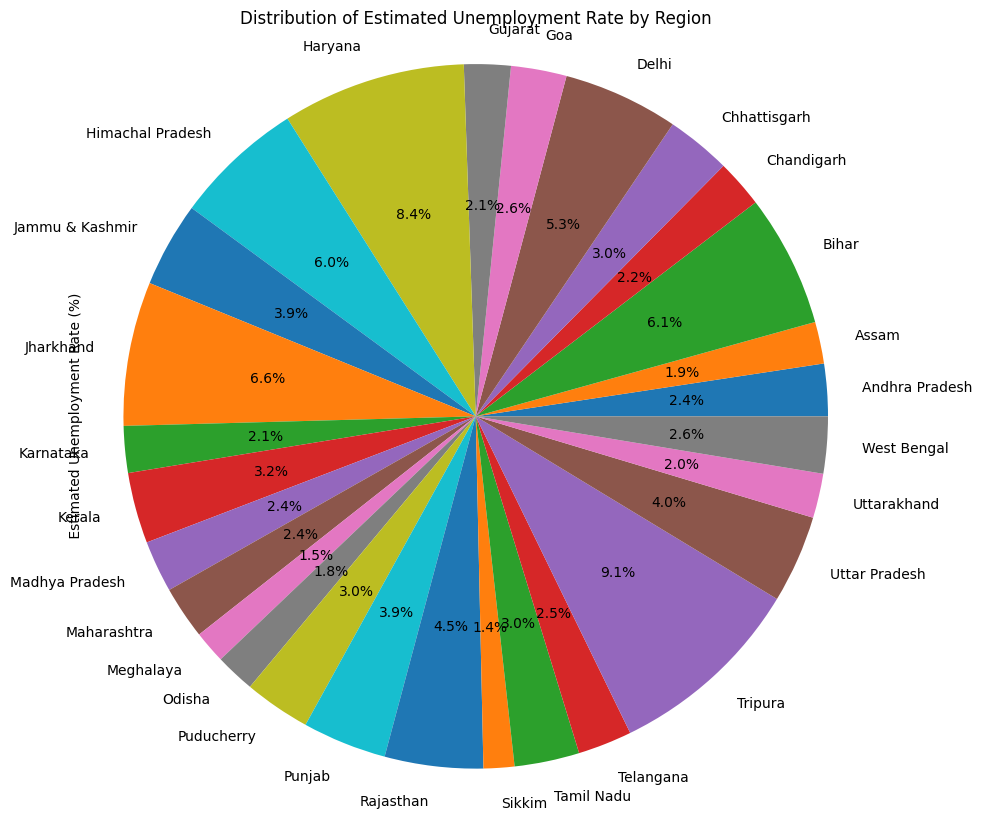

In [30]:
# Distribution of Estimated UnEmployement Rate by Region
plt.figure(figsize=(10,10))
data = df[['Region', ' Estimated Unemployment Rate (%)']]
data_grouped = df.groupby('Region')[' Estimated Unemployment Rate (%)'].sum()
data_grouped.plot(kind='pie', autopct='%1.1f%%', startangle=360)
plt.title('Distribution of Estimated Unemployment Rate by Region')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [31]:
import plotly.express as px
import calendar

In [32]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate(%)','Estimated Employed',
'Estimated Labour Participation Rate(%)', 'Region']
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# Converting 'Frequency' and 'Region' columns to categorical data type
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')
# Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df['Date'].dt.month
# Converting 'Month' to integer format
df['Month_int'] = df['Month'].apply(lambda x: int(x))
# Mapping integer month values to abbreviated month names
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])
df.drop(columns= 'Month',inplace = True)

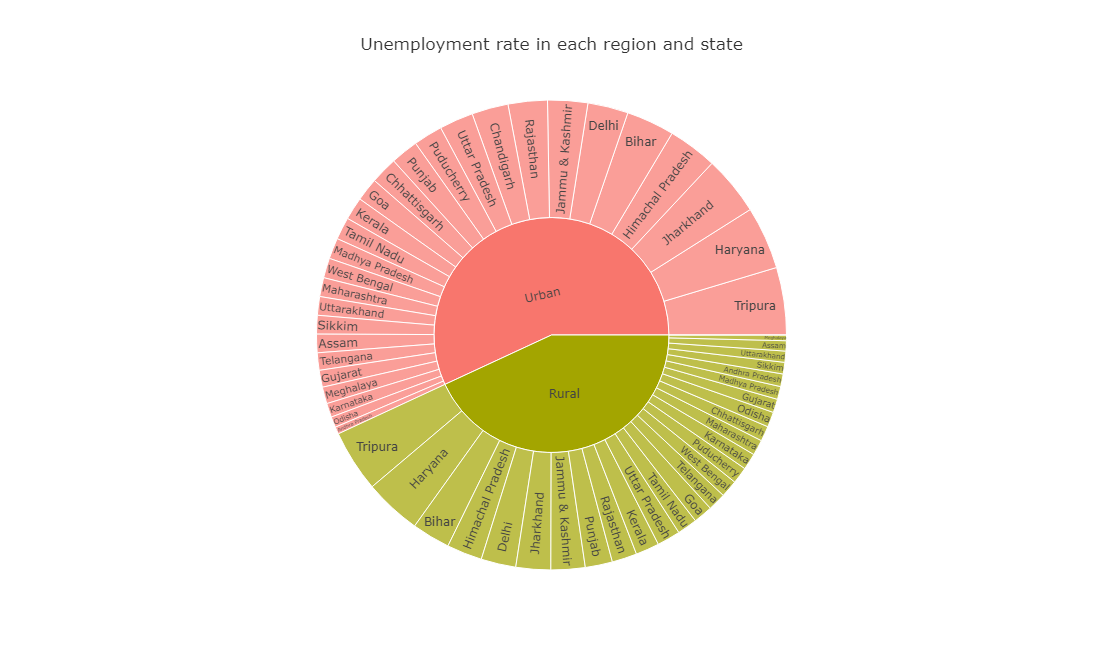

In [33]:
# Sunburst chart showing unemployment rate in each region and state
unemplo_df = df[['States', 'Region', 'Estimated Unemployment Rate(%)', 'Estimated Employed', 'Estimated Labour Participation Rate(%)']]
unemplo = unemplo_df.groupby(['Region', 'States'])['Estimated Unemployment Rate(%)'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region', 'States'], values='Estimated Unemployment Rate(%)',
color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
height=650, template='ggplot2')
fig.show()

In [34]:
df

States       Date Frequency  Estimated Unemployment Rate(%)  \
0    Andhra Pradesh 2019-05-31   Monthly                            3.65   
1    Andhra Pradesh 2019-06-30   Monthly                            3.05   
2    Andhra Pradesh 2019-07-31   Monthly                            3.75   
3    Andhra Pradesh 2019-08-31   Monthly                            3.32   
4    Andhra Pradesh 2019-09-30   Monthly                            5.17   
..              ...        ...       ...                             ...   
763  Andhra Pradesh 2019-11-30   Monthly                            0.00   
764  Andhra Pradesh 2019-11-30   Monthly                            0.00   
765  Andhra Pradesh 2019-11-30   Monthly                            0.00   
766  Andhra Pradesh 2019-11-30   Monthly                            0.00   
767  Andhra Pradesh 2019-11-30   Monthly                            0.00   

     Estimated Employed  Estimated Labour Participation Rate(%) Region  \
0            11999139.0                                   43.24  Rural   
1            11755881.0                                   42.05  Rural   
2            12086707.0                                   43.50  Rural   
3            12285693.0                                   43.97  Rural   
4            12256762.0                                   44.68  Rural   
..                  ...                                     ...    ...   
763             49420.0                                   39.04  Urban   
764             49420.0                                   39.04  Urban   
765             49420.0                                   39.04  Urban   
766             49420.0                                   39.04  Urban   
767             49420.0                                   39.04  Urban   

     Month_int Month_name  
0            5        May  
1            6        Jun  
2            7        Jul  
3            8        Aug  
4            9        Sep  
..         ...        ...  
763         11        Nov  
764         11        Nov  
765         11        Nov  
766         11        Nov  
767         11        Nov  

[768 rows x 9 columns]

In [35]:
# Time Series Analysis

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose


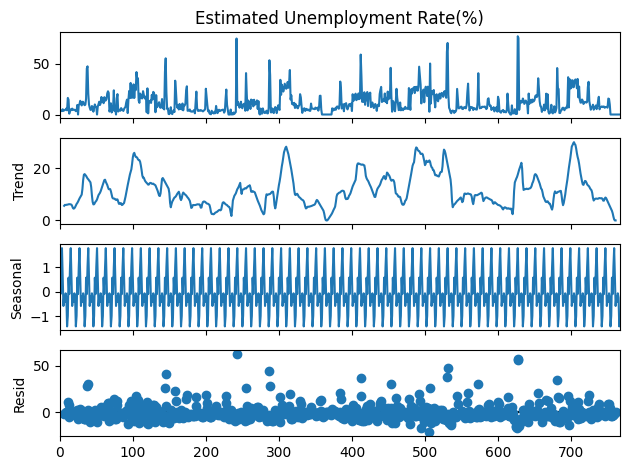

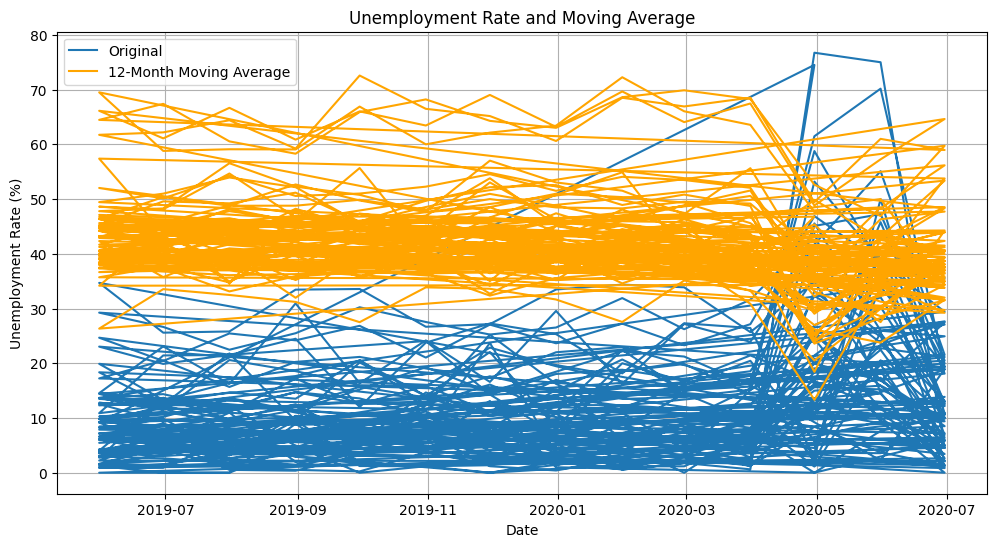

In [37]:
# Decomposition
decomposed = seasonal_decompose(df['Estimated Unemployment Rate(%)'], model='additive', period=12)
decomposed.plot()
plt.show()

# Moving average
df['unemployment_rate_MA'] = df['Estimated Unemployment Rate(%)'].rolling(window=12).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Estimated Unemployment Rate(%)'], label='Original')
plt.plot(df['Date'], df['Estimated Labour Participation Rate(%)'], label='12-Month Moving Average', color='orange')
plt.legend()
plt.title('Unemployment Rate and Moving Average')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [38]:
# ARIMA Model for Forecasting

In [39]:
from statsmodels.tsa.arima.model import ARIMA


                                     SARIMAX Results                                      
Dep. Variable:     Estimated Unemployment Rate(%)   No. Observations:                  768
Model:                             ARIMA(1, 1, 1)   Log Likelihood               -2777.718
Date:                            Tue, 30 Jul 2024   AIC                           5561.436
Time:                                    11:49:00   BIC                           5575.363
Sample:                                         0   HQIC                          5566.796
                                            - 768                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4320      0.024     18.132      0.000       0.385       0.479
ma.L1         -0.9313      0.017   

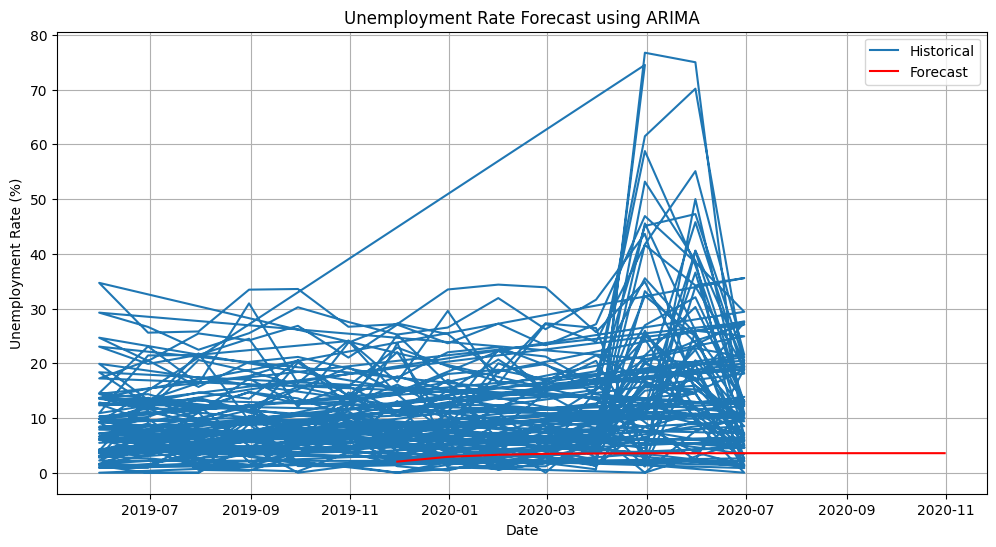

In [40]:
# Fit the ARIMA model
model = ARIMA(df['Estimated Unemployment Rate(%)'], order=(1, 1, 1))
fit_model = model.fit()
print(fit_model.summary())

# Forecasting
forecast = fit_model.forecast(steps=12)
print(forecast)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Estimated Unemployment Rate(%)'], label='Historical')
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')
plt.legend()
plt.title('Unemployment Rate Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [41]:
# Using Prophet for Forecasting

In [42]:
from prophet import Prophet


11:49:01 - cmdstanpy - INFO - Chain [1] start processing
11:49:02 - cmdstanpy - INFO - Chain [1] done processing


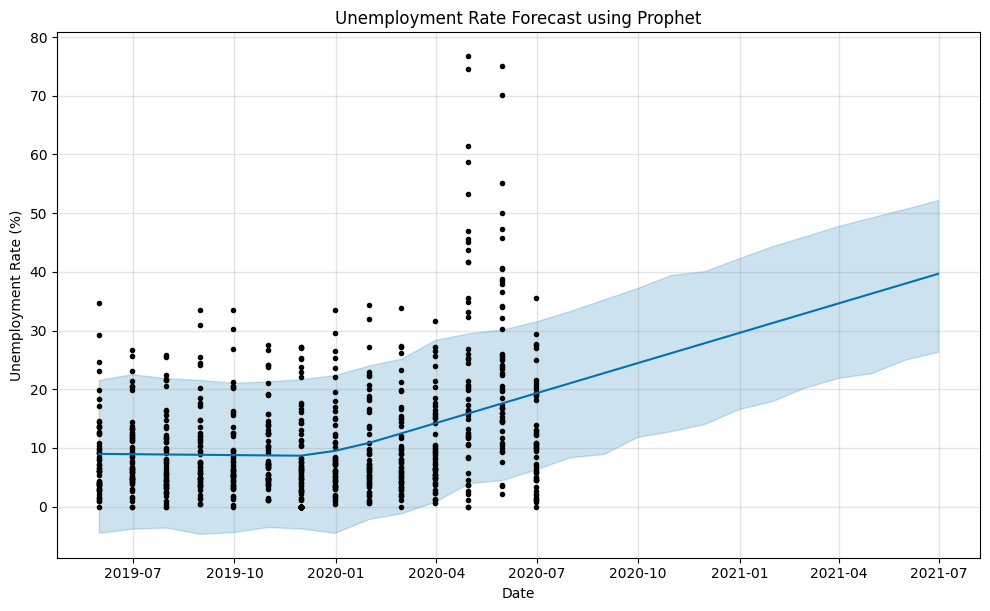

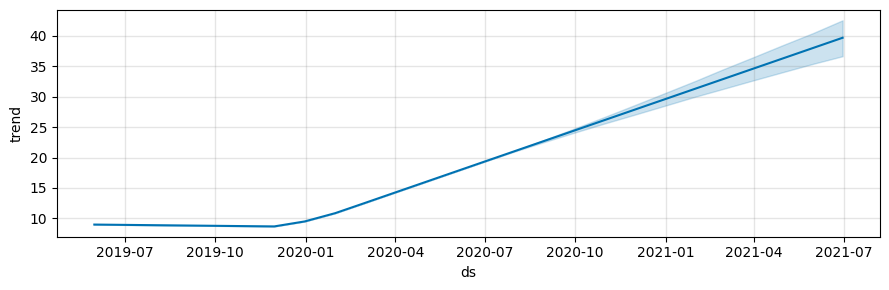

In [43]:
# Prepare the data for Prophet
df_prophet = df.rename(columns={'Date': 'ds', 'Estimated Unemployment Rate(%)': 'y'})

# Fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Make future dataframe
future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast_prophet = model_prophet.predict(future)

# Plot the forecast
fig = model_prophet.plot(forecast_prophet)
plt.title('Unemployment Rate Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

# Plot forecast components
fig2 = model_prophet.plot_components(forecast_prophet)
plt.show()


In [44]:
# Data Visualization Dashboard

In [45]:
import pandas as pd
import numpy as np
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [46]:
# Initialize your Dash app
app = dash.Dash(__name__)

# Sample DataFrame (replace this with your actual data loading)
df = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=100, freq='M'),
    'Estimated Unemployment Rate(%)': np.random.rand(100) * 10  # Example data
})

app.layout = html.Div([
    html.H1('Unemployment Rate Analysis Dashboard'),
    
    dcc.Graph(id='unemployment-rate-graph'),
    
    html.Label('Select Year:'),
    dcc.Slider(
        id='year-slider',
        min=df['Date'].dt.year.min(),
        max=df['Date'].dt.year.max(),
        value=df['Date'].dt.year.min(),
        marks={str(year): str(year) for year in df['Date'].dt.year.unique()},
        step=None
    ),
    
    html.Label('Select Moving Average Window:'),
    dcc.Slider(
        id='ma-slider',
        min=1,
        max=24,
        value=12,
        marks={i: str(i) for i in range(1, 25)},
        step=1
    ),
    
    html.Label('Select Forecast Model:'),
    dcc.RadioItems(
        id='forecast-model',
        options=[
            {'label': 'ARIMA', 'value': 'ARIMA'},
            {'label': 'Prophet', 'value': 'Prophet'}
        ],
        value='ARIMA'
    )
])

@app.callback(
    Output('unemployment-rate-graph', 'figure'),
    [Input('year-slider', 'value'), Input('ma-slider', 'value'), Input('forecast-model', 'value')]
)
def update_figure(selected_year, ma_window, forecast_model):
    try:
        filtered_df = df[df['Date'].dt.year == selected_year]
        filtered_df['unemployment_rate_MA'] = filtered_df['Estimated Unemployment Rate(%)'].rolling(window=ma_window).mean()

        fig = {
            'data': [
                {'x': filtered_df['Date'], 'y': filtered_df['Estimated Unemployment Rate(%)'], 'type': 'line', 'name': 'Estimated Unemployment Rate(%)'},
                {'x': filtered_df['Date'], 'y': filtered_df['unemployment_rate_MA'], 'type': 'line', 'name': f'{ma_window}-Month Moving Average'}
            ],
            'layout': {
                'title': f'Unemployment Rate in {selected_year}',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Estimated Unemployment Rate(%)'},
                'showlegend': True
            }
        }
        
        if forecast_model == 'ARIMA':
            model = ARIMA(filtered_df['Estimated Unemployment Rate(%)'], order=(1, 1, 1))
            fit_model = model.fit()
            forecast = fit_model.forecast(steps=12)
            forecast_dates = pd.date_range(filtered_df['Date'].iloc[-1] + pd.DateOffset(months=1), periods=12, freq='M')
            fig['data'].append({'x': forecast_dates, 'y': forecast, 'type': 'line', 'name': 'ARIMA Forecast', 'line': {'dash': 'dash'}})
        elif forecast_model == 'Prophet':
            df_prophet = filtered_df.rename(columns={'Date': 'ds', 'Estimated Unemployment Rate(%)': 'y'})
            model_prophet = Prophet()
            model_prophet.fit(df_prophet)
            future = model_prophet.make_future_dataframe(periods=12, freq='M')
            forecast_prophet = model_prophet.predict(future)
            forecast_dates = forecast_prophet['ds'][-12:]
            forecast_values = forecast_prophet['yhat'][-12:]
            fig['data'].append({'x': forecast_dates, 'y': forecast_values, 'type': 'line', 'name': 'Prophet Forecast', 'line': {'dash': 'dash'}})
        
        return fig
    except Exception as e:
        print(f"An error occurred: {e}")
        return {
            'data': [],
            'layout': {
                'title': 'Error occurred',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Estimated Unemployment Rate(%)'},
                'showlegend': True
            }
        }

if __name__ == '__main__':
    app.run_server(port=8051, debug=True)


Dash is running on http://127.0.0.1:8051/

 * Serving Flask app '__main__'
 * Debug mode: on


SystemExit: 1